In [24]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import ast
import operator

import matplotlib
from matplotlib import pyplot

pyplot.style.use('ggplot')
pyplot.rcParams['figure.dpi'] = 100
pyplot.rcParams['figure.figsize'] = [12,5]
matplotlib.rc('lines', linewidth=1, linestyle='-')

C:\Users\crash\miniconda3\envs\test_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
### load the csv file

dataset = pd.read_csv('new_stores/hourly_store_0051.csv', header=0, infer_datetime_format=True,
                   parse_dates=['ds'], index_col=['ds'])

n_days = len(dataset.iloc[:,:].groupby(dataset.iloc[:,:].index.date))
print("days: "+str(n_days))
dataset = dataset[['n_clients']]
print(dataset.iloc[:,:])
dataset

days: 1749
                     n_clients
ds                            
2015-01-02 10:00:00         82
2015-01-02 11:00:00        100
2015-01-02 12:00:00        127
2015-01-02 13:00:00        162
2015-01-02 14:00:00        123
...                        ...
2020-10-17 17:00:00         50
2020-10-17 18:00:00         63
2020-10-17 19:00:00         75
2020-10-17 20:00:00        128
2020-10-17 21:00:00         29

[22588 rows x 1 columns]


C:\Users\crash\miniconda3\envs\test_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,n_clients
ds,
2015-01-02 10:00:00,82
2015-01-02 11:00:00,100
2015-01-02 12:00:00,127
2015-01-02 13:00:00,162
2015-01-02 14:00:00,123
...,...
2020-10-17 17:00:00,50
2020-10-17 18:00:00,63
2020-10-17 19:00:00,75


C:\Users\crash\miniconda3\envs\test_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


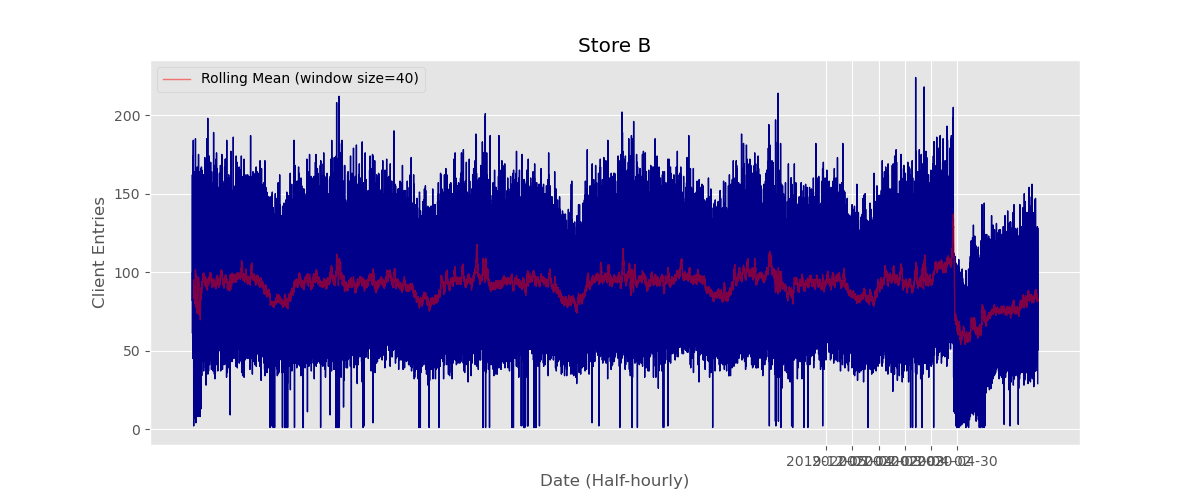

In [26]:
%matplotlib notebook
#naive_yhat_sequence=dataset['clients_that_bought'].values[-1400-175+(175*i):-1400+(175*i)]
# plot each iteration 
pyplot.title('Store B')
pyplot.plot(dataset.n_clients.values, color="darkblue")
rolmean = pd.Series(dataset.n_clients.values).rolling(window=40).mean()
pyplot.plot(rolmean, color='red', alpha=0.5, label='Rolling Mean (window size=40)')
#pyplot.plot(naive_yhat_sequence, alpha=0.8, color="green", label="Naive Predicted")
pyplot.xticks([16937, 17637 , 18337, 19037, 19737, 20437], labels=['2019-12-05', '2020-01-04', '2020-02-02', '2020-03-03', '2020-04-02', '2020-04-30'])
#pyplot.xticks([0, 25, 50, 75, 100, 125, 150, 175], labels=['2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15'])
#pyplot.xticks([0, 25, 50, 75, 100, 125, 150, 175], labels=['2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22'])
#pyplot.xticks([0, 175, 350, 525, 700], labels=['2020-04-29', '2020-05-06', '2020-05-13', '2020-05-20', '2020-05-27'])
pyplot.legend(loc="upper left")
pyplot.xlabel("Date (Half-hourly)")
pyplot.ylabel("Client Entries")
pyplot.show()

In [27]:
def get_most_regular_schedule(df):
    check_dict = dict()
    # iterate by days
    for idx, day in df.groupby(df.index.date):
        day_sched = list()
        # get list(keys-schedules) for the dict
        for i in day.index.time:
            hour = i.strftime("%H:%M:%S")
            day_sched.append(hour)
        day_sched = str(day_sched)
        if day_sched in check_dict:
            check_dict[day_sched]+=1
        else:
            check_dict.update({day_sched : 1})
    print(max(check_dict.keys(), key=len))
    # the schedule with max ocurrences
    k, v = max(check_dict.items(), key=operator.itemgetter(1))
    k = ast.literal_eval(k)
    
    return k,v, check_dict
    

C:\Users\crash\miniconda3\envs\test_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
reg_schedule, v, check_dict = get_most_regular_schedule(dataset)
print(reg_schedule,v)

['09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00']
['09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00'] 1587


In [29]:
def fill_gaps(df, reg_schedule=None, hour_in=None, hour_out=None):
    counter = 0 # counter of imputations to perform
    
    # create custom schedule with hour_in and hour_out
    if hour_in is not None and hour_out is not None:
        hour_in = datetime.strptime(hour_in, '%H:%M:%S')
        hour_out = datetime.strptime(hour_out, '%H:%M:%S')
        reg_schedule = list()
        while hour_in <= hour_out:
            reg_schedule.append(str(datetime.strptime(str(hour_in.time()), '%H:%M:%S').time()))
            hour_in+=timedelta(minutes=60)
        print(reg_schedule)
        
    # fill the gaps with NaN
    for i in reg_schedule:
        i = datetime.strptime(i, '%H:%M:%S').time()
        print(i)
        for j, day in df.groupby(df.index.date):
            if i not in list(day.index.time):
                #print(i, day)
                #df.loc[pd.to_datetime(str(j)+" "+str(i))] = [np.nan, np.nan, np.nan, np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
                df.loc[pd.to_datetime(str(j)+" "+str(i))] = [np.nan]
                counter+=1
                
    # add column "imputed"
    df['imputed'] = np.where(((pd.isnull(df['n_clients']))), 'yes', 'no')
    
    print("Total rows to input: "+str(counter))
    df = df.sort_index()     
    
    # Dataframe with NaNs to be imputed and excess datetimes
    return df       

In [30]:
dataset = fill_gaps(dataset, hour_in='9:00:00', hour_out='23:00:00')#, hour_in='08:00:00', hour_out='12:00:00')
dataset

['09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00']
09:00:00
10:00:00
11:00:00
12:00:00
13:00:00
14:00:00
15:00:00
16:00:00
17:00:00
18:00:00
19:00:00
20:00:00
21:00:00
22:00:00
23:00:00
Total rows to input: 3708


,n_clients,imputed
ds,,
2015-01-02 09:00:00,NaN,yes
2015-01-02 10:00:00,82.0,no
2015-01-02 11:00:00,100.0,no
2015-01-02 12:00:00,127.0,no
2015-01-02 13:00:00,162.0,no
...,...,...
2020-10-17 19:00:00,75.0,no
2020-10-17 20:00:00,128.0,no
2020-10-17 21:00:00,29.0,no


In [31]:
# check schedules again
reg_schedule, v, check_dict = get_most_regular_schedule(dataset)

# see other schedules as well
for x, y in check_dict.items():
    print(str(x)+" : "+str(y)+" \n")

C:\Users\crash\miniconda3\envs\test_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00']
['09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00'] : 1688 

['08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00'] : 60 

['07:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00'] : 1 



In [32]:
# uncomment to test a break in the schedule
# del reg_schedule[9:11]

In [33]:
# Remove non-regular time rows
def filter_schedule(df, schedule):
    # convert schedule to datetime pd.Series
    pd_schedule = pd.to_datetime(pd.Series(schedule))
    # create a sequence of indexed halfhours
    pd_schedule = pd_schedule.dt.strftime('%H').astype('int64')*2 + pd_schedule.dt.strftime('%M').astype('int64')//30
    
    # check if the schedule is continuous
    if (max(pd_schedule) - min(pd_schedule) + 1 == len(pd_schedule)):
        # no breaks
        df = df.between_time(schedule[0], schedule[-1])
    else:
        # there is a break
        df_schedule = pd.DataFrame({'time':schedule, 'hh':pd_schedule})
        # find break
        for i in df_schedule.index:
            if (df_schedule.at[i+1,'hh'] - df_schedule.at[i,'hh']) != 1:
                break
        close_morning = df_schedule.at[i,'time']
        open_afternoon = df_schedule.at[i+1,'time']
        #print('break from',close_morning,'to',open_afternoon)
        # make 2 splits
        df1 = df.between_time(schedule[0], close_morning)
        df2 = df.between_time(open_afternoon, schedule[-1])
        # join
        df = pd.concat([df1, df2]).sort_index()
    
    return df

In [34]:
dataset = filter_schedule(dataset, reg_schedule)
dataset

,n_clients,imputed
ds,,
2015-01-02 09:00:00,NaN,yes
2015-01-02 10:00:00,82.0,no
2015-01-02 11:00:00,100.0,no
2015-01-02 12:00:00,127.0,no
2015-01-02 13:00:00,162.0,no
...,...,...
2020-10-17 19:00:00,75.0,no
2020-10-17 20:00:00,128.0,no
2020-10-17 21:00:00,29.0,no


In [35]:
# Imput missing data day-by-day
def input_inday(df, method='linear'):
    # ignore pandas.loc warning
    import warnings
    warnings.filterwarnings('ignore')
    
    # get list of days
    for dt in np.unique(df.index.date):
        # input each day individualy
        df.loc[str(dt)] = df.loc[str(dt)].interpolate(method=method, limit_direction='both', order=3)
        
    warnings.filterwarnings('default')
    
    return df

C:\Users\crash\miniconda3\envs\test_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
imp_dataset = input_inday(dataset, method='linear')
imp_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26235 entries, 2015-01-02 09:00:00 to 2020-10-17 23:00:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   n_clients  26235 non-null  float64
 1   imputed    26235 non-null  object 
dtypes: float64(1), object(1)
memory usage: 614.9+ KB


In [14]:
imp_dataset

C:\Users\crash\miniconda3\envs\test_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,n_clients,imputed
ds,,
2015-01-02 08:00:00,-92.154483,yes
2015-01-02 09:00:00,92.814007,yes
2015-01-02 10:00:00,199.000000,no
2015-01-02 11:00:00,268.000000,no
2015-01-02 12:00:00,337.000000,no
...,...,...
2020-10-18 19:00:00,-2775.124516,yes
2020-10-18 20:00:00,-4017.140848,yes
2020-10-18 21:00:00,-5557.375340,yes


In [37]:
imp_dataset.to_csv("imputed_stores/hourly_linear_interp_store0051.csv")

C:\Users\crash\miniconda3\envs\test_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
